# ATTENTION: 

Remember to pull before any change and to push often! (Problem on merging)

# Test for project1, sandbox

In [34]:
%matplotlib inline
from Regressions import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train Data loading

In [35]:
from proj1_helpers import *

y, x_all, ids = load_csv_data('../Data/train.csv')
y[y==-1] = 0

In [36]:
print('Y shape : ', y.shape)
print('X shape : ', x_all.shape)

Y shape :  (250000,)
X shape :  (250000, 30)


In [37]:
x = np.delete(x_all,[4,5,6,12,26,27,28],1)

 which Definition

In [38]:
which = range(1) #Change according to desired features in tests

### Scatter plots

ATTENTION: missing values in 0th feature removed!
Scatter plot for 0th feature :


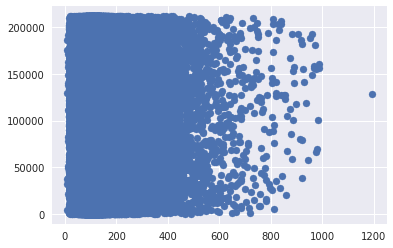

In [39]:
for i in which:
    feature = x[:,i]
    if len(feature[feature==-999]) > 0: #If there is some misplaced value we do not include them in the scatterplot
        print("ATTENTION: missing values in {i}th feature removed!".format(i=i))
    feature = feature[feature>-999]
    plt.scatter(feature, range(len(feature)))
    print("Scatter plot for {i}th feature :".format(i=i))
    plt.show()

### Histograms

In [40]:
def hist_plot(data,i):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=data, bins=50, color='#0504aa',
                                alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('{i}th feature'.format(i=i))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

/home/charles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


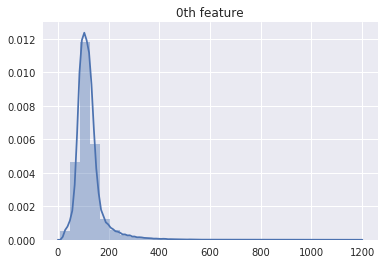

In [41]:
for i in which:
    feature = x[:,i]
    feature = feature[feature>-999]
#     hist_plot(feature,i)
    sns.distplot(feature,bins=30,kde=True)
    plt.title('{i}th feature'.format(i=i))
    plt.show()

### Single feature-response plots

Scatter plot for 0th feature :


/home/charles/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/charles/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


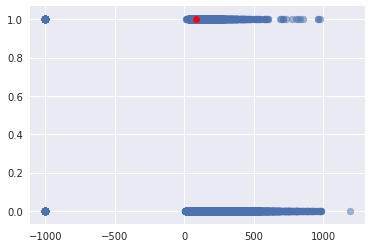

In [42]:
for i in which:
    print("Scatter plot for {i}th feature :".format(i=i))

    t = x[:,i]
    plt.scatter(t,y, alpha = 0.5)
    mean_x1 = np.mean(t[y == 1])
    mean_x0 = np.mean(t[y == -1])
    plt.plot(mean_x0,-1,"or")
    plt.plot(mean_x1,1,"or")
    plt.show()

### Feature boxplots
Visually check influence on response

Boxplot for 0th feature :


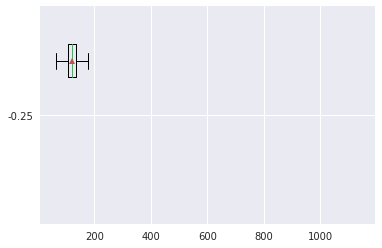

In [43]:
for i in which:
    feature = x[:,i]
    print("Boxplot for {i}th feature :".format(i=i))
    plt.xlim(left = np.min(feature[feature>-999])-0.5)
    plt.xlim(right = np.max(feature[feature>-999])+.5)
    #the mean is dispayed as a triangle
    yes_feat = feature[y==1]
    no_feat = feature[y==-1]
    plt.boxplot(yes_feat[yes_feat>-999],vert = False, positions=[0],showmeans=True)
    plt.boxplot(no_feat[no_feat>-999], vert = False, positions=[-.25], showmeans=True)
    plt.show()
    


### Features with "too many" -999

Checked to eventually remove them.

In [44]:
for i in range(x.shape[1]):
    percentage = len(np.where(x[:,i] < -500)[0])/len(x[:,i])*100
    print("feature {i}: {percentage} of Na".format(i = i, percentage = percentage))

feature 0: 15.245600000000001 of Na
feature 1: 0.0 of Na
feature 2: 0.0 of Na
feature 3: 0.0 of Na
feature 4: 0.0 of Na
feature 5: 0.0 of Na
feature 6: 0.0 of Na
feature 7: 0.0 of Na
feature 8: 0.0 of Na
feature 9: 0.0 of Na
feature 10: 0.0 of Na
feature 11: 0.0 of Na
feature 12: 0.0 of Na
feature 13: 0.0 of Na
feature 14: 0.0 of Na
feature 15: 0.0 of Na
feature 16: 0.0 of Na
feature 17: 0.0 of Na
feature 18: 0.0 of Na
feature 19: 39.9652 of Na
feature 20: 39.9652 of Na
feature 21: 39.9652 of Na
feature 22: 0.0 of Na


## explanation for deleting feature 19

due to high correlation between features 6,17,22, we decided to delete the feature 19 from our 
data set since it contained 39% of NANs

In [45]:
x = np.delete(x_all,[4,5,6,12,19,26,27,28],1)
x = np.c_[np.ones(x.shape[0]),x]
print(x.shape, y.shape)

(250000, 23) (250000,)


## deletion of rows with Nan's

In [46]:
y_line_modified = y[~np.any(x==-999,axis = 1)]
x_line_modified =  x[~np.any(x==-999,axis = 1),:]
print(x_line_modified.shape,y_line_modified.shape)

(138096, 23) (138096,)


# Test of first linear model for prediction

In [47]:
W,R = least_squares(y,x)

In [48]:
y_hat_proba = x.dot(W) 

In [49]:
y_hat_proba[y_hat_proba > 0.5]=1
y_hat_proba[y_hat_proba < 0.5]= 0
print(y)
print(y_hat_proba)
np.sum(abs(y-y_hat_proba))/len(y)

[1. 0. 0. ... 1. 0. 0.]
[0. 1. 0. ... 0. 1. 0.]


0.266572

In [50]:
W_mod,R_mod = least_squares(y_line_modified,x_line_modified)

In [51]:
y_hat_proba = x_line_modified.dot(W_mod) 

In [52]:
y_hat_proba[y_hat_proba > 0.5]=1
y_hat_proba[y_hat_proba < 0.5]= 0
print(y)
print(y_hat_proba)
np.sum(abs(y_line_modified-y_hat_proba))/len(y_line_modified)

[1. 0. 0. ... 1. 0. 0.]
[0. 1. 0. ... 0. 1. 0.]


0.31885065461707796

error on the train set

## tests for correlation

In [53]:
from Regressions import least_squares_GD, least_squares

In [54]:
y_ = x[19]
tx = np.c_[np.ones(len(x[19])),x[6],x[17],x[22]]
w = np.array([ 5.75767025, -0.12264227,  0.30415068,  1.23212527])
tx = tx[y_>-900]
y_ = y_[y_>-900]


In [55]:
least_squares(y_,tx)

(array([ 2.21605319, -0.11626141,  0.31722745,  1.21716922]), 70.9398587094886)

In [57]:
weights,losses = least_squares_GD(y_,tx,w,50,gamma = 0.01, all_step=True)

In [58]:
e= y_-tx.dot(w)

In [59]:
print(max(e))
print(min(e))

23.963509905109987
-26.5869318051


## Standardization of the features

In [60]:
def standardize(x):
    mean_x = np.mean(x)
    x = x-mean_x
    std_x = np.std(x)
    x = x / std_x
    return x

In [61]:
for i in range(1,tx.shape[1]):
    tx[:,i] = standardize(tx[:,i])

# K folds Cross-validation

K fold validation test, with loss function being the number of badly classified element

def cv(y,x, model, k = 5, *args):
    '''
    y response, x features
    split the data randomly in k parts approximately the same size, then train a  model (this HAS to be a function)
    k times on k-1 part of the data set and then evaluates the error on the data left out
    
    output: estimate of the prediction  error of the model (a double)
    
    * args are what are necessary for the model outside of the response and the features
    
    example of utilisation: error_expected = cv(y,x,least_squares(),k = 5)
    '''
    dataset_split = []
    shuffle_indices = np.random.permutation(np.arange(data_size))
    shuffled_y = y[shuffle_indices]
    shuffled_tx = tx[shuffle_indices]
    
    for i in range(k):
        data_split = np.c_[]
    
    
    for y_k, x_k in batch_iter(y, x, batch_size = int(len(y)/k), num_batches = k, shuffle= True):
        dataset_split.append((y_k,x_k))
        
    for i in range(k): 
        
    

wwww = cv(y,x,least_squares,k = 5)

wwww[0][1].shape

len(y)

# Inputation of the data 

we know that the features with missing variables are the 1, 19,20,21. Hence we only "treat" these ones by different methods

In [62]:
def inputation(data, method = "mean"):
    '''
    input the missing values with the different methods: mean,median
    
    example of use: data_inputed = inputation(data,method = "median")
    
    for the moment only treat the features number 1,19,20,21 but could be easily generalized if felt necessary
    '''
    
    features_treated = [1,19,20,21]
    
    if method == "mean":
        for i in features_treated:
            t = data[:,i]
            mean = np.mean(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
    if method == "median":
        for i in features_treated:
            t = data[:,i]
            mean = np.median(t[t != -999])
            data_inputed = data.copy()
            data_inputed[data_inputed == -999] = mean
        
        return data_inputed
    
        

In [63]:
test_data = inputation(x,method = "mean")

In [64]:
test_data_1 = inputation(x,method = "median")

In [68]:
W,error = least_squares(y,test_data)

In [69]:
W1, error1 = least_squares(y,test_data_1)

In [70]:
print(max(abs(W-W1)),abs(error-error1))

2.3693484058950887e-05 2.4694272182657073e-09


# Prediction test 

In [85]:
y_test, x_all_test, ids_test = load_csv_data('../Data/test.csv')
y_test[y_test==-1] = 0

# Test with CV 

In [71]:
from Regressions import *

test_data is inputed with mean, and test_data_1 is inputed with median

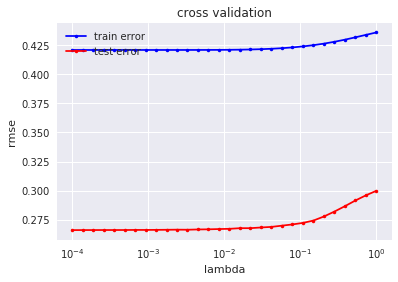

In [82]:
w,rmse_te,rmse_tr = cross_validation(y,test_data,k_fold = 5)

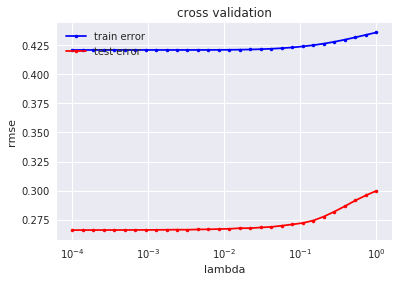

In [83]:
w1,rmse_te1,rmse_tr1 = cross_validation(y,test_data_1,k_fold = 5)